In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import files
files.upload()

Saving heart_failure.csv to heart_failure.csv


{'heart_failure.csv': b'age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT\n75,0,582,0,20,1,265000,1.9,130,1,0,4,1\n55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1\n65,0,146,0,20,0,162000,1.3,129,1,1,7,1\n50,1,111,0,20,0,210000,1.9,137,1,0,7,1\n65,1,160,1,20,0,327000,2.7,116,0,0,8,1\n90,1,47,0,40,1,204000,2.1,132,1,1,8,1\n75,1,246,0,15,0,127000,1.2,137,1,0,10,1\n60,1,315,1,60,0,454000,1.1,131,1,1,10,1\n65,0,157,0,65,0,263358.03,1.5,138,0,0,10,1\n80,1,123,0,35,1,388000,9.4,133,1,1,10,1\n75,1,81,0,38,1,368000,4,131,1,1,10,1\n62,0,231,0,25,1,253000,0.9,140,1,1,10,1\n45,1,981,0,30,0,136000,1.1,137,1,0,11,1\n50,1,168,0,38,1,276000,1.1,137,1,0,11,1\n49,1,80,0,30,1,427000,1,138,0,0,12,0\n82,1,379,0,50,0,47000,1.3,136,1,0,13,1\n87,1,149,0,38,0,262000,0.9,140,1,0,14,1\n45,0,582,0,14,0,166000,0.8,127,1,0,14,1\n70,1,125,0,25,1,237000,1,140,0,0,15,1\n48,1,582,1,55,0,87000,1.9,121,0,0,15,1\n65,1,52,0,25

In [5]:
df=pd.read_csv('heart_failure.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [6]:
# Display first five entries of data

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
# Display last five entries of data

df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [8]:
# Display random numbers of data

df.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
222,42.000,1,86,0,35,0,365000.00,1.10,139,1,1,201,0
234,53.000,1,582,0,45,0,305000.00,1.10,137,1,1,209,0
119,86.000,0,582,0,38,0,263358.03,1.83,134,0,0,95,1
143,61.000,1,84,0,40,1,229000.00,0.90,141,0,0,110,0
127,58.000,1,200,1,60,0,300000.00,0.80,137,0,0,104,0
5,90.000,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
6,75.000,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
19,48.000,1,582,1,55,0,87000.00,1.90,121,0,0,15,1
74,69.000,0,582,0,20,0,266000.00,1.20,134,1,1,73,1
185,60.667,1,104,1,30,0,389000.00,1.50,136,1,0,171,1


In [9]:
# Show the information of data to find any null value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
# Show the statistical summary of data

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [11]:
# Show the value of taget column

df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [12]:
# Show correlation between columns

df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Negative (0):  203
Positive (0):  96


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


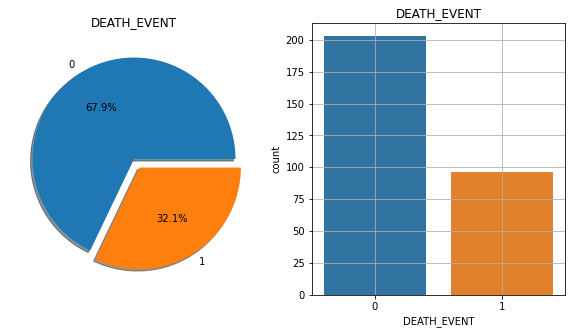

In [13]:
# Count plot of DEATH_EVENT data

f, ax=plt.subplots(1,2,figsize=(10,5))
df['DEATH_EVENT'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('DEATH_EVENT')
ax[0].set_ylabel('')
sb.countplot('DEATH_EVENT', data=df, ax=ax[1])
ax[1].set_title('DEATH_EVENT')
N,P = df['DEATH_EVENT'].value_counts()
print('Negative (0): ', N)
print('Positive (0): ', P)
plt.grid()
plt.show()

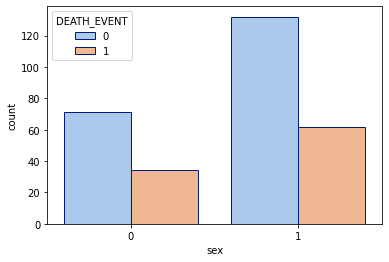

In [14]:
# Visualize disease rate subjectedly sex

sb.countplot(x='sex',hue='DEATH_EVENT',data=df,palette='pastel',edgecolor=sb.color_palette('dark',n_colors=1))

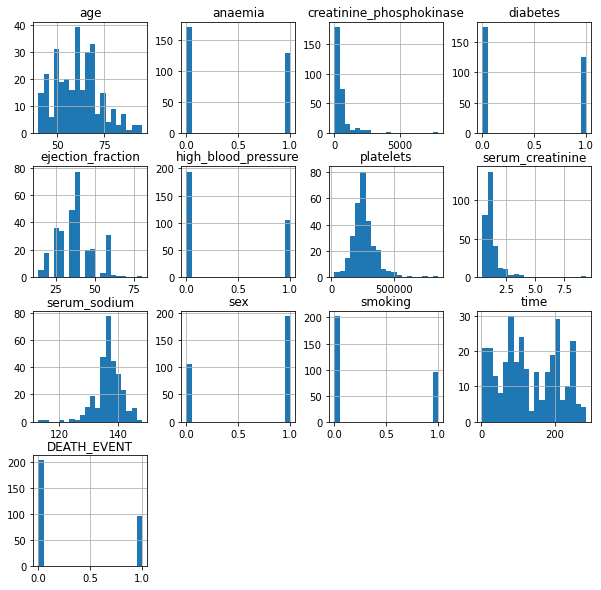

In [15]:
# Histogram of columns

df.hist(bins=20,figsize=(10,10))
plt.show()

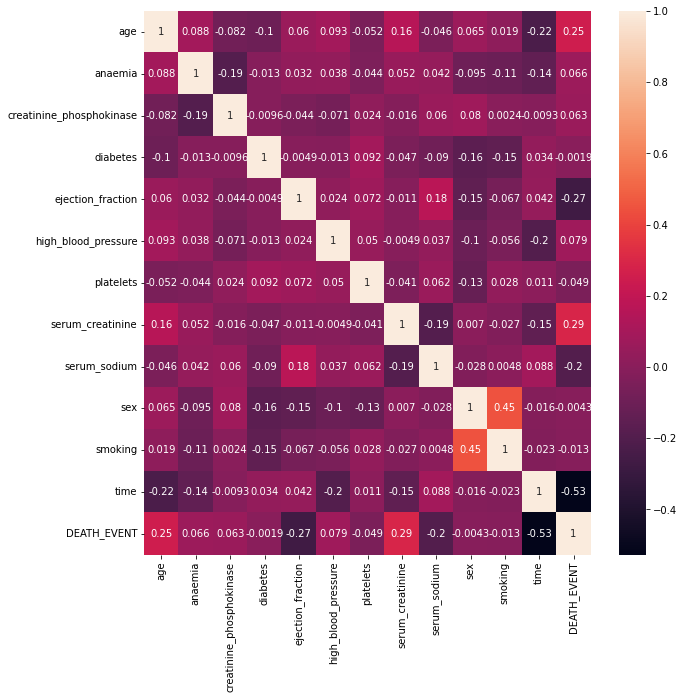

In [16]:
# Correlation analysis

corrmat=df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

#plot heat map
g = sb.heatmap(df[top_corr_features].corr(), annot=True)

In [17]:
target_name='DEATH_EVENT'

# Separate object for target feature
y = df[target_name]

# Separate object for input feature
x = df.drop(target_name, axis=1)

In [18]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [21]:
x_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12
210,70.0,0,212,1,17,1,389000.0,1.0,136,1,1,188
236,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,0,33
163,50.0,1,2334,1,35,0,75000.0,0.9,142,0,0,126
...,...,...,...,...,...,...,...,...,...,...,...,...
203,60.0,0,59,0,25,1,212000.0,3.5,136,1,1,187
255,52.0,1,191,1,30,1,334000.0,1.0,142,1,1,216
72,85.0,0,5882,0,35,0,243000.0,1.0,132,1,1,72
235,77.0,1,109,0,50,1,406000.0,1.1,137,1,0,209


In [22]:
y_train

14     0
210    0
236    0
44     1
163    1
      ..
203    0
255    0
72     1
235    0
37     1
Name: DEATH_EVENT, Length: 209, dtype: int64

In [23]:
x_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
173,50.0,1,115,0,20,0,189000.0,0.80,139,1,0,146
287,45.0,0,582,1,55,0,543000.0,1.00,132,0,0,250
51,53.0,1,91,0,20,1,418000.0,1.40,139,0,0,43
146,52.0,0,132,0,30,0,218000.0,0.70,136,1,1,112
214,65.0,1,135,0,35,1,290000.0,0.80,134,1,0,194
...,...,...,...,...,...,...,...,...,...,...,...,...
122,60.0,0,96,1,38,0,228000.0,0.75,140,0,0,95
246,55.0,0,2017,0,25,0,314000.0,1.10,138,1,0,214
278,50.0,1,1051,1,30,0,232000.0,0.70,136,0,0,246
251,55.0,0,572,1,35,0,231000.0,0.80,143,0,0,215


In [24]:
y_test

173    0
287    0
51     1
146    0
214    0
      ..
122    0
246    1
278    0
251    0
19     1
Name: DEATH_EVENT, Length: 90, dtype: int64

Random Forest

In [25]:
from sklearn. ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [26]:
print("Train Accuracy of Random Forest Algorithm ", rf.score(x_train,y_train)*100)
print("Test Accuracy score of Random Forest Algorithm ", rf.score(x_test,y_test)*100)

Train Accuracy of Random Forest Algorithm  100.0
Test Accuracy score of Random Forest Algorithm  91.11111111111111


Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
print("Train Accuracy of Decision Tree Algorithm ", dt.score(x_train,y_train)*100)
print("Test Accuracy score of Decision Tree Algorithm ", dt.score(x_test,y_test)*100)

Train Accuracy of Decision Tree Algorithm  100.0
Test Accuracy score of Decision Tree Algorithm  78.88888888888889


Logistic Regression Algorithm

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [31]:
print("Train Accuracy of Logistic Regression ", lr.score(x_train,y_train)*100)
print("Test Accuracy score of Logistic Regression ", lr.score(x_test,y_test)*100)

Train Accuracy of Logistic Regression  81.3397129186603
Test Accuracy score of Logistic Regression  82.22222222222221


KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [33]:
print("Train Accuracy of KNN Algorithm ", knn.score(x_train,y_train)*100)
print("Test Accuracy score of KNN Algorithm ", knn.score(x_test,y_test)*100)

Train Accuracy of KNN Algorithm  74.64114832535886
Test Accuracy score of KNN Algorithm  61.111111111111114


Naive-Bayes Algorithm

In [34]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [35]:
print("Train Accuracy of Naive-Bayes Algorithm ", nb.score(x_train,y_train)*100)
print("Test Accuracy score of Naive-Bayes Algorithm ", nb.score(x_test,y_test)*100)

Train Accuracy of Naive-Bayes Algorithm  80.38277511961722
Test Accuracy score of Naive-Bayes Algorithm  84.44444444444444


Predicting Outcome

In [36]:
# Prediction on test using random forest

rf_pred = rf.predict(x_test)

In [37]:
# Prediction on test using decision tree

dt_pred = dt.predict(x_test)

In [38]:
# Prediction on test using logistic regression

lr_pred = lr.predict(x_test)

In [39]:
# Prediction on test using KNN

knn_pred = knn.predict(x_test)

In [40]:
# Prediction on test using naive bayes

nb_pred = nb.predict(x_test)

# Confusion Matrix

Random Forest

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, rf_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 62
FP 2
FN 6
TP 20
Accuracy rate 91.11111111111111
Misclassification rate 8.88888888888889


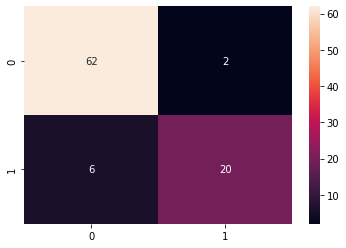

In [42]:
sb.heatmap(confusion_matrix(y_test, rf_pred), annot=True,fmt="d")

Decision Tree Algorithm

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, dt_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 56
FP 8
FN 11
TP 15
Accuracy rate 78.88888888888889
Misclassification rate 21.11111111111111


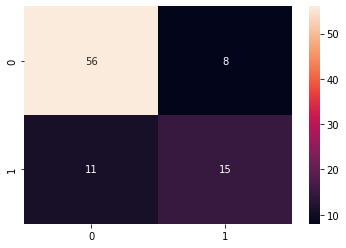

In [44]:
sb.heatmap(confusion_matrix(y_test, dt_pred), annot=True,fmt="d")

Logistic Regretion Algorithm

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, lr_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 57
FP 7
FN 9
TP 17
Accuracy rate 82.22222222222221
Misclassification rate 17.77777777777778


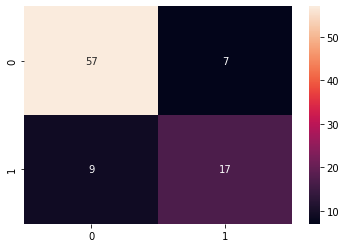

In [46]:
sb.heatmap(confusion_matrix(y_test, lr_pred), annot=True,fmt="d")

KNN

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, knn_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 53
FP 11
FN 24
TP 2
Accuracy rate 61.111111111111114
Misclassification rate 38.88888888888889


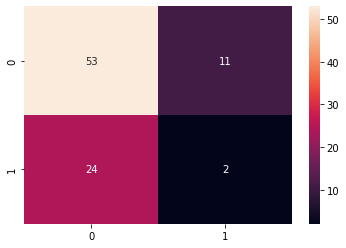

In [48]:
sb.heatmap(confusion_matrix(y_test, knn_pred), annot=True,fmt="d")

Naive-Bayes

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, nb_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 61
FP 3
FN 11
TP 15
Accuracy rate 84.44444444444444
Misclassification rate 15.555555555555555


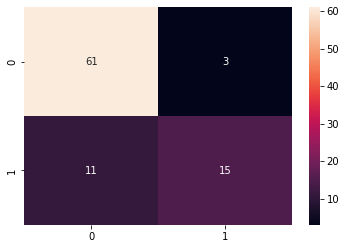

In [50]:
sb.heatmap(confusion_matrix(y_test, nb_pred), annot=True,fmt="d")